<center><h1 style="font-size:2.5vw"> AML Project 1 </h1></center>

---
<div style="display:flex; flex-direction:row; width:35%; justify-content : space-between">
    <div style = "display : flex, flex-direction : column">
        <div><b><font color = "#3285d3">Authors</font></b></div>
        <div><b><font color = "#3285d3">Date</font></b></div>
    </div>
    <div style = "display : flex, flex-direction : column">
        <div><b>&nbsp;&nbsp;:&nbsp;&nbsp;</b></div>
        <div><b>&nbsp;&nbsp;:&nbsp;&nbsp;</b></div>
    </div>
    <div style = "display : flex, flex-direction : column">
        <div>Albert Roathel, Marcel Affi</div>
        <div>April 2021</div>
    </div>
</div>

# Project outline

1. [Preprocessing Datasets](#Preprocessing_Datasets)
2. [Measures of Classification](#measures_of_classification)
3. [Optimization Algorithms](#optimization_algorithms)
4. [Experiments](#experiments)

<a id='Preprocessing_Datasets'></a>
## Preprocessing Datasets

We chose to work with the following datasets, each consisting of binary class variables : 
* Diabetes
* Students

TODO: ADD MORE DATASETS

### Downloading the datasets

In [1]:
%%capture --no-stderr

# Banknote authentication
!curl -O -k https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt


### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Seaborn properties
sns.set(rc={'figure.figsize':(11.7,5), 'figure.dpi':200})

# plotty properties
def show_plot(fig):
    fig.update_layout({
        'plot_bgcolor': 'rgba(10, 10, 10, 0.1)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'xaxis': {
            'showgrid': False,
            'showline': False,
        },
        'yaxis': {
            'showgrid': False,
            'showline': False,
        }
    })
    fig.show()

# Ignore numpy overflow warnings in sigmoid function
np.seterr( over='ignore' );

In [37]:
def get_radar_plot(df, target_name, category_0_label, category_1_label):
    input_df = df.copy().iloc[:,0:-1]
    
    #Scaling variables
    scaler = MinMaxScaler()
    input_df = pd.DataFrame(scaler.fit_transform(input_df), columns=input_df.columns)

    categories = input_df.columns.to_list()
    means_0 = input_df.loc[df[target_name] == 0].mean().to_list()
    means_1 = input_df.loc[df[target_name] == 1].mean().to_list()

    targets = df.iloc[:, -1]
    fig = go.Figure()
    
    
    fig.add_trace(go.Scatterpolar(
          r=means_1,
          theta=categories,
          fill='toself',
          name=category_1_label,
    ))
    fig.add_trace(go.Scatterpolar(
          r=means_0,
          theta=categories,
          fill='toself',
          name=category_0_label
    ))

    fig.update_layout(
        
        {
            'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        },

        legend=dict(
            orientation="h",
            yanchor="top",
            y=-0.1,
            xanchor="left",
            x=0.375
        ),

      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )

    fig.show()

In [10]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [35]:
haberman = pd.read_csv('haberman.csv',names = ["age", "year", "nodes", "survival"])
haberman.survival = haberman.survival-1
get_radar_plot(haberman, target_name='survival', category_0_label = "Survived", category_1_label = "Not Survived")

In [38]:
diabetes = pd.read_csv('diabetes2.csv')
get_radar_plot(diabetes, target_name='Outcome', category_0_label = "Diabetic", category_1_label = "Not Diabetic")

In [42]:
banknote = pd.read_csv('data_banknote_authentication.txt', names=['var', 'skew', 'kurt', 'entr', 'y'])
get_radar_plot(banknote, target_name='y', category_0_label = "Forged", category_1_label = "Not Forged")

In [44]:
bank = pd.read_csv('bank.csv', delimiter=';')
bank = bank.drop(['job', 'default', 'contact', 'day', 'month', 'poutcome'], axis = 1)
bank.marital = pd.get_dummies(bank.marital)
bank.education = pd.get_dummies(bank.education)
bank.housing = pd.get_dummies(bank.housing)
bank.loan = pd.get_dummies(bank.loan)
bank.y = pd.get_dummies(bank.y)
bank_trim = trimm_correlated(bank.iloc[:, :-1],0.2)
get_radar_plot(bank, target_name='y', category_0_label = "Subscribed", category_1_label = "Not Subscribed")

In [46]:
sonar = pd.read_csv('sonar', usecols=range(1,61), names=range(60), header=2)
sonar.iloc[:,-1] = sonar.iloc[:,-1].apply(lambda x : 1 if x == 'R' else 0)
sonar_trim = trimm_correlated(sonar.iloc[:,:-1], 0.8)
sonar.head()

0       1       2       3       4       5       6       7       8   \
0  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264   
1  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459   
2  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105  0.3039   
3  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083  0.3513   
4  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465  0.2838   

       9   ...      50      51      52      53      54      55      56  \
0  0.0881  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
1  0.4152  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
2  0.2988  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   
3  0.1786  ...  0.0201  0.0248  0.0131  0.0070  0.0138  0.0092  0.0143   
4  0.2802  ...  0.0081  0.0120  0.0045  0.0121  0.0097  0.0085  0.0047   

       57      58  59  
0  0.0040  0.0117   1  
1  0.0107  0.0094   1  
2  0.0051  0.0062   1  
3  0.0036  0.0103   1  
4  0.0048  0.0053   1  

[5 rows x 60 columns]

In [51]:
diabetes_trim = trimm_correlated(diabetes.iloc[:,0:-1], 0.9)
banknote_trim = trimm_correlated(banknote.iloc[:,0:-1], 0.9)

In [52]:
datasets = dict(
    banknote=[banknote_trim.values, banknote['y'].values],
    diabetes=[diabetes_trim.values, diabetes.Outcome.values],
    haberman=[haberman.iloc[:, :-1].values.astype(float), haberman.survival.values],
    bank = [bank_trim.iloc[:, :-1].values.astype(float), bank.y.values],
    sonar = [sonar_trim.values, sonar.iloc[:,-1].values]
)

In [53]:
X = banknote_trim.values
y = banknote['y'].values

In [54]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

<a id='measures_of_classification'></a>
## Measures of classification

In [55]:

def calculate_scores(y_true, y_pred, beta=None):
    unique_classes = np.unique(y_true)
    conf_matrix = np.zeros([len(unique_classes), len(unique_classes)])
    conf_matrix[0, 0] = np.sum(y_pred[y_true==0] == 0)
    conf_matrix[1, 1] = np.sum(y_pred[y_true==1] == 1)
    conf_matrix[0, 1] = np.sum(y_pred[y_true==0] == 1)
    conf_matrix[1, 0] = np.sum(y_pred[y_true==1] == 0)
    
    R2=None
    if beta is not None:
        beta_null = beta.copy()
        beta_null[1:] = 0
        R2 = 1 - cost_function(X_test, y_test, beta) / cost_function(X_test, y_test, beta_null)
    
    acc = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, 1)
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, 0)
    conf_matrix = pd.DataFrame(conf_matrix, columns=["0", "1"])
    f1 = 2 * precision * recall / (precision + recall)
    results = dict(conf_matrix=conf_matrix, acc=acc, recall=recall, precision=precision, f1=f1, R2=R2)
    return results


<a id='optimization_algorithms'></a>
## Optimization Algorithms

In [56]:
# sigmoid function; models the probability in logistic regression
def sigmoid(X, beta):
    exp = np.exp(np.dot(X, -beta))
    return 1 / (1 + exp)

In [57]:
# cost function for log likelihood optimization
def cost_function_der(X, y, beta):
    return np.dot(X.T, (y - sigmoid(X, beta)))

def cost_function(X, y, beta):
    tmp = X.dot(np.array(beta))
    return tmp.dot(y) - np.log(1 + np.exp(tmp)).sum()


In [58]:
# gradient descent approach for minimazation
def gradient_descent(X, y, n_iter=1000, l_rate=1e-4, tolerance=0.001, get_cost=False):
    N, p = X.shape
    # initial betas
    beta = np.random.randn(p)
    
    for i in range(n_iter):
        _beta = beta.copy()
        grad = cost_function_der(X, y, beta)
        beta += grad * l_rate
        tol = np.sum(abs(beta - _beta))
        if tolerance:
            if tol < tolerance and tolerance:
                return beta if not get_cost else (beta, cost_function(X, y, beta))
    
    return beta if not get_cost else (beta, cost_function(X, y, beta))

In [59]:
def SGD(X, y, n_iter=1000, l_rate=1e-4, n_chunk=50, tolerance=0.001, get_cost=False):
    N, p = X.shape
    # initial betas
    beta = np.random.randn(p)
    
    for _ in range(n_iter):
        _beta = beta.copy()
        ind = np.arange(N)
        np.random.shuffle(ind)
        for i in range(0, N, n_chunk):
            subset = ind[i:min(i + n_chunk, N) + 1]
            grad = cost_function_der(X, y, beta)
            update = grad * l_rate
            beta += update
        tol = np.sum(abs(beta - _beta)) 
        if tolerance:
            if tol < tolerance:
                return beta if not get_cost else (beta, cost_function(X, y, beta))
    return beta if not get_cost else (beta, cost_function(X, y, beta))

In [60]:
def IRLS(X, y, n_iter=1000, tolerance=0.0001, get_cost=False):
    n, p = X.shape
    w = np.ones(n)
    W = np.diag(w)
    B = np.dot(np.linalg.inv(X.T.dot(W).dot(X)), (X.T.dot(W).dot(y)))
    for i in range(n_iter):
        p = sigmoid(X, B)
        w = p * (1 - p)
        W = np.diag(w)
        z = X.dot(B) + np.linalg.inv(W).dot(y - p)
        tmp = X.T.dot(W)
        _B = np.dot(np.linalg.inv(tmp.dot(X)), ( tmp.dot(z)))
        if tolerance:
            if np.linalg.norm(_B - B) < tolerance:
                return B if not get_cost else (B, cost_function(X, y, beta))
        B = _B
    return B if not get_cost else (B, cost_function(X, y, beta))


<a id='experiments'></a>
## Experiments

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
np.random.seed(500)

beta = gradient_descent(X_train, y_train, l_rate=0.1)
pred = (sigmoid(X_test, beta) > 0.5).astype(int)
res = calculate_scores(y_test, pred)
print(f'The resulting accuracy is {res["acc"]*100:.2f}%')
res["conf_matrix"].head()

The resulting accuracy is 98.79%


0      1
0  226.0    3.0
1    2.0  181.0

In [63]:
np.random.seed(500)

beta = SGD(X_train, y_train, l_rate=0.1)
pred = (sigmoid(X_test, beta) > 0.5).astype(int)
res = calculate_scores(y_test, pred)
print(f'The resulting accuracy is {res["acc"]*100:.2f}%')
res["conf_matrix"].head()

The resulting accuracy is 99.03%


0      1
0  227.0    2.0
1    2.0  181.0

In [64]:
beta = IRLS(X_train, y_train, tolerance=0.0005)
pred = (sigmoid(X_test, beta) > 0.5).astype(int)
res = calculate_scores(y_test, pred)
print(f'The resulting accuracy is {res["acc"]*100:.2f}%')
res["conf_matrix"].head()

The resulting accuracy is 99.03%


0      1
0  227.0    2.0
1    2.0  181.0

In [65]:
def performance_over_iterations(X, y, iterations : int, opt_method, n=10, tol=None):
    acc_list = []
    for i in range(n):
        beta = opt_method(X, y, n_iter = iterations, tolerance=tol)
        pred = (sigmoid(X_test, beta) > 0.5).astype(int)
        acc_list.append(calculate_scores(y_test, pred)['acc'])
    return [iterations, np.mean(acc_list)]

from_iter, to_iter, step_size = 1, 101, 2

  0%|          | 0/50 [00:00<?, ?it/s]

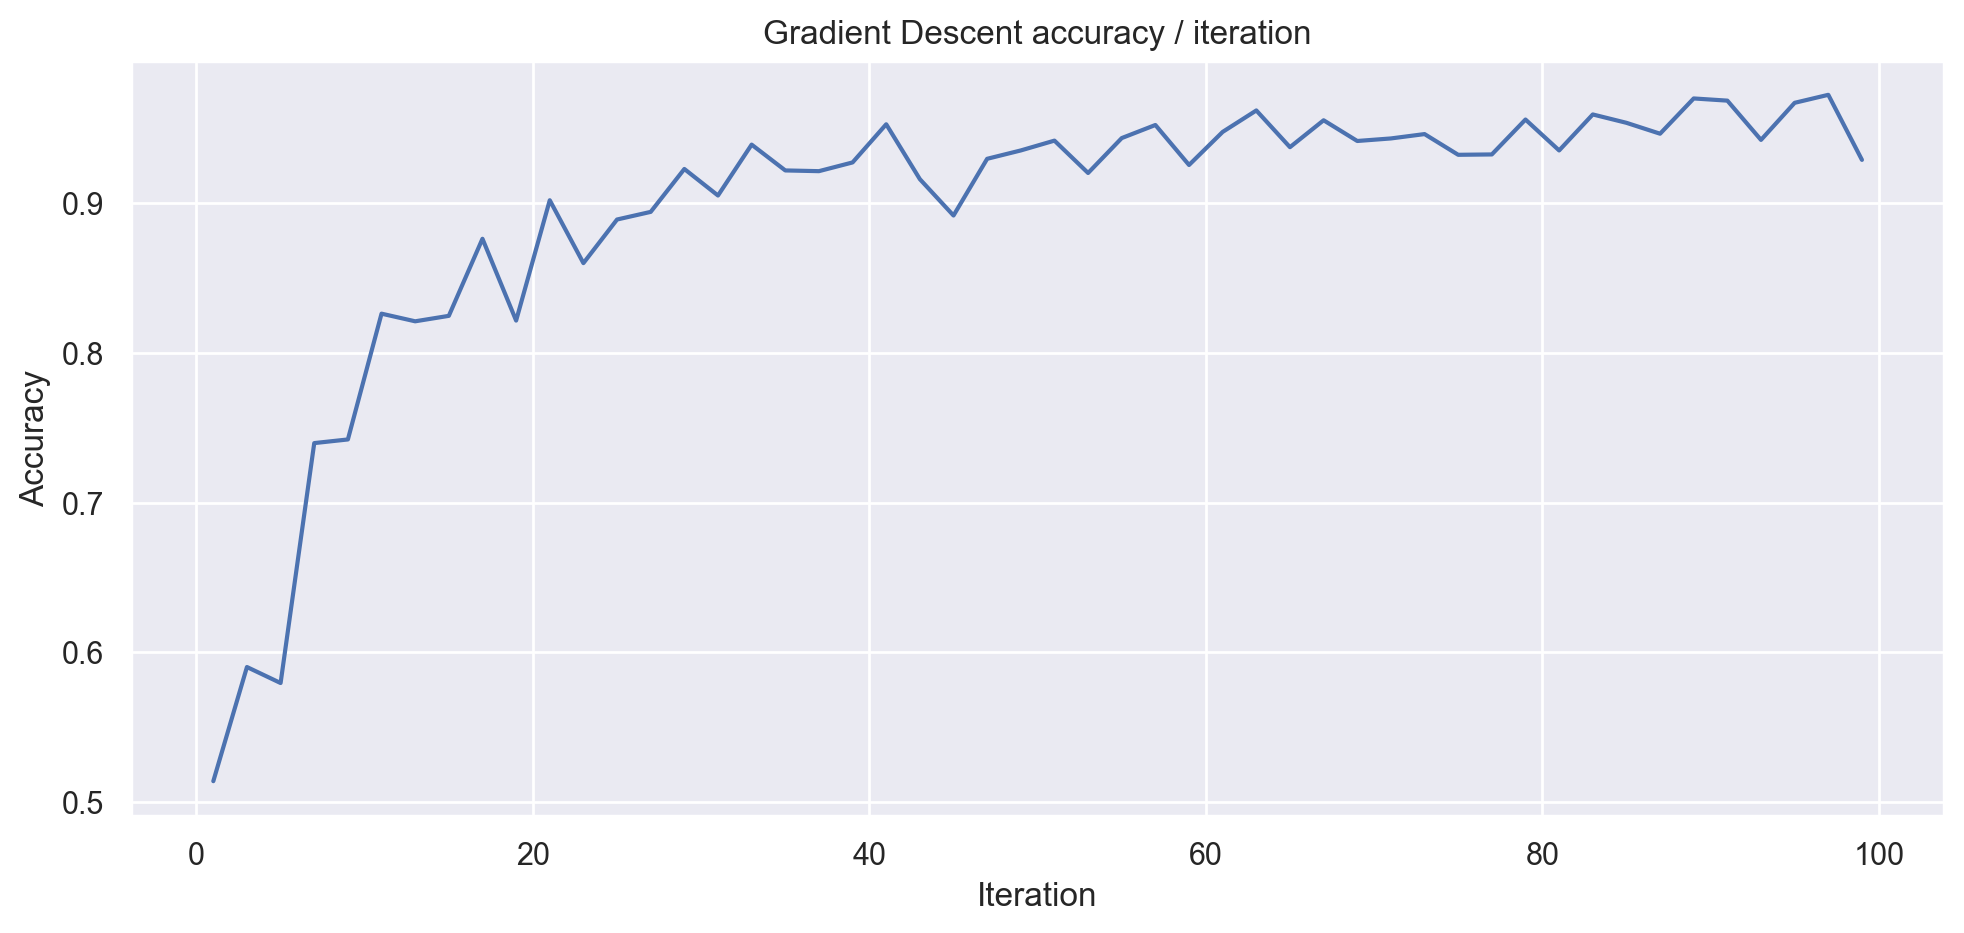

In [66]:
np.random.seed(500)

gd_iter_acc_list = [performance_over_iterations(X_train, y_train, iters, gradient_descent) 
                    for iters in tqdm(range(from_iter, to_iter, step_size))]
gd_iter_acc = pd.DataFrame (gd_iter_acc_list,columns=['Iteration', 'Accuracy'])

sns.set_style("darkgrid")
sns.lineplot(data= gd_iter_acc, x = "Iteration", y = "Accuracy").set_title("Gradient Descent accuracy / iteration")
plt.savefig('Gd-Iteration', dpi = 300)
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

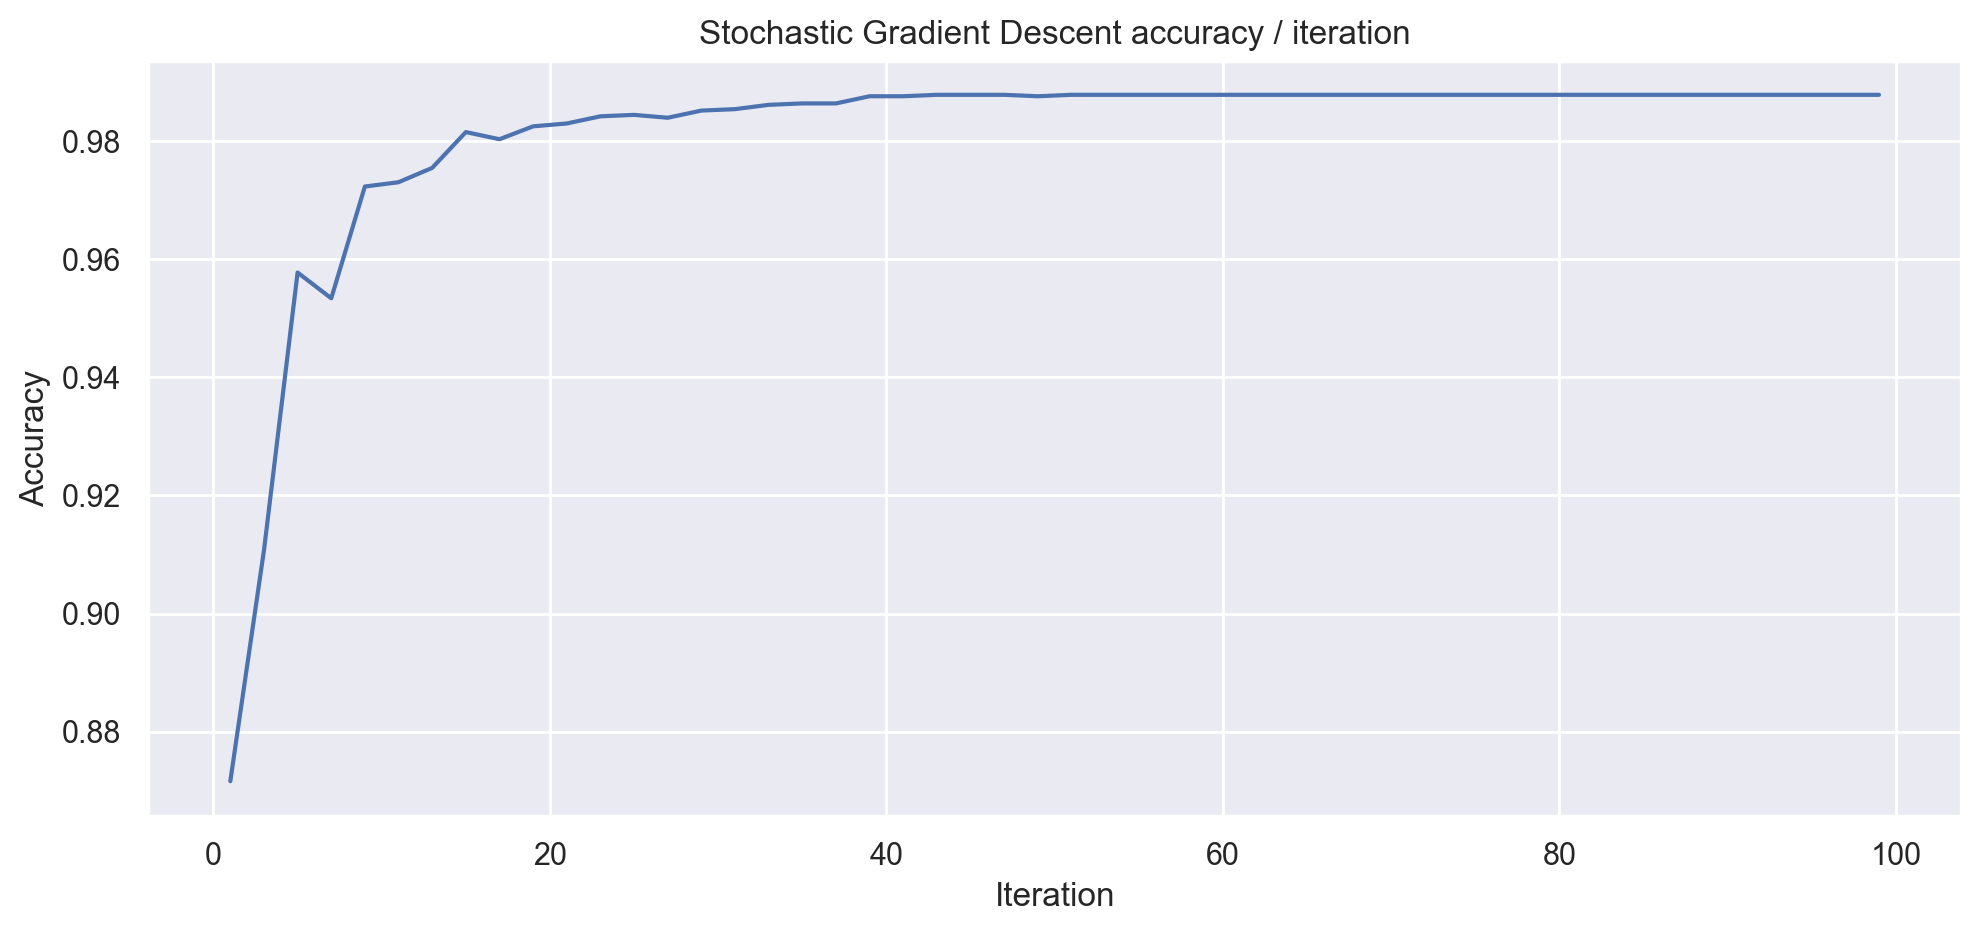

In [67]:
np.random.seed(500)

sgd_iter_acc_list = [performance_over_iterations(X_train, y_train, iters, SGD) 
                     for iters in tqdm(range(from_iter, to_iter, step_size))]
sgd_iter_acc = pd.DataFrame (sgd_iter_acc_list,columns=['Iteration', 'Accuracy'])

sns.set_style("darkgrid")
sns.lineplot(data= sgd_iter_acc, x = "Iteration", y = "Accuracy").set_title("Stochastic Gradient Descent accuracy / iteration")
plt.savefig('SGD-Iteration', dpi = 300)
plt.show()

  0%|          | 0/14 [00:00<?, ?it/s]

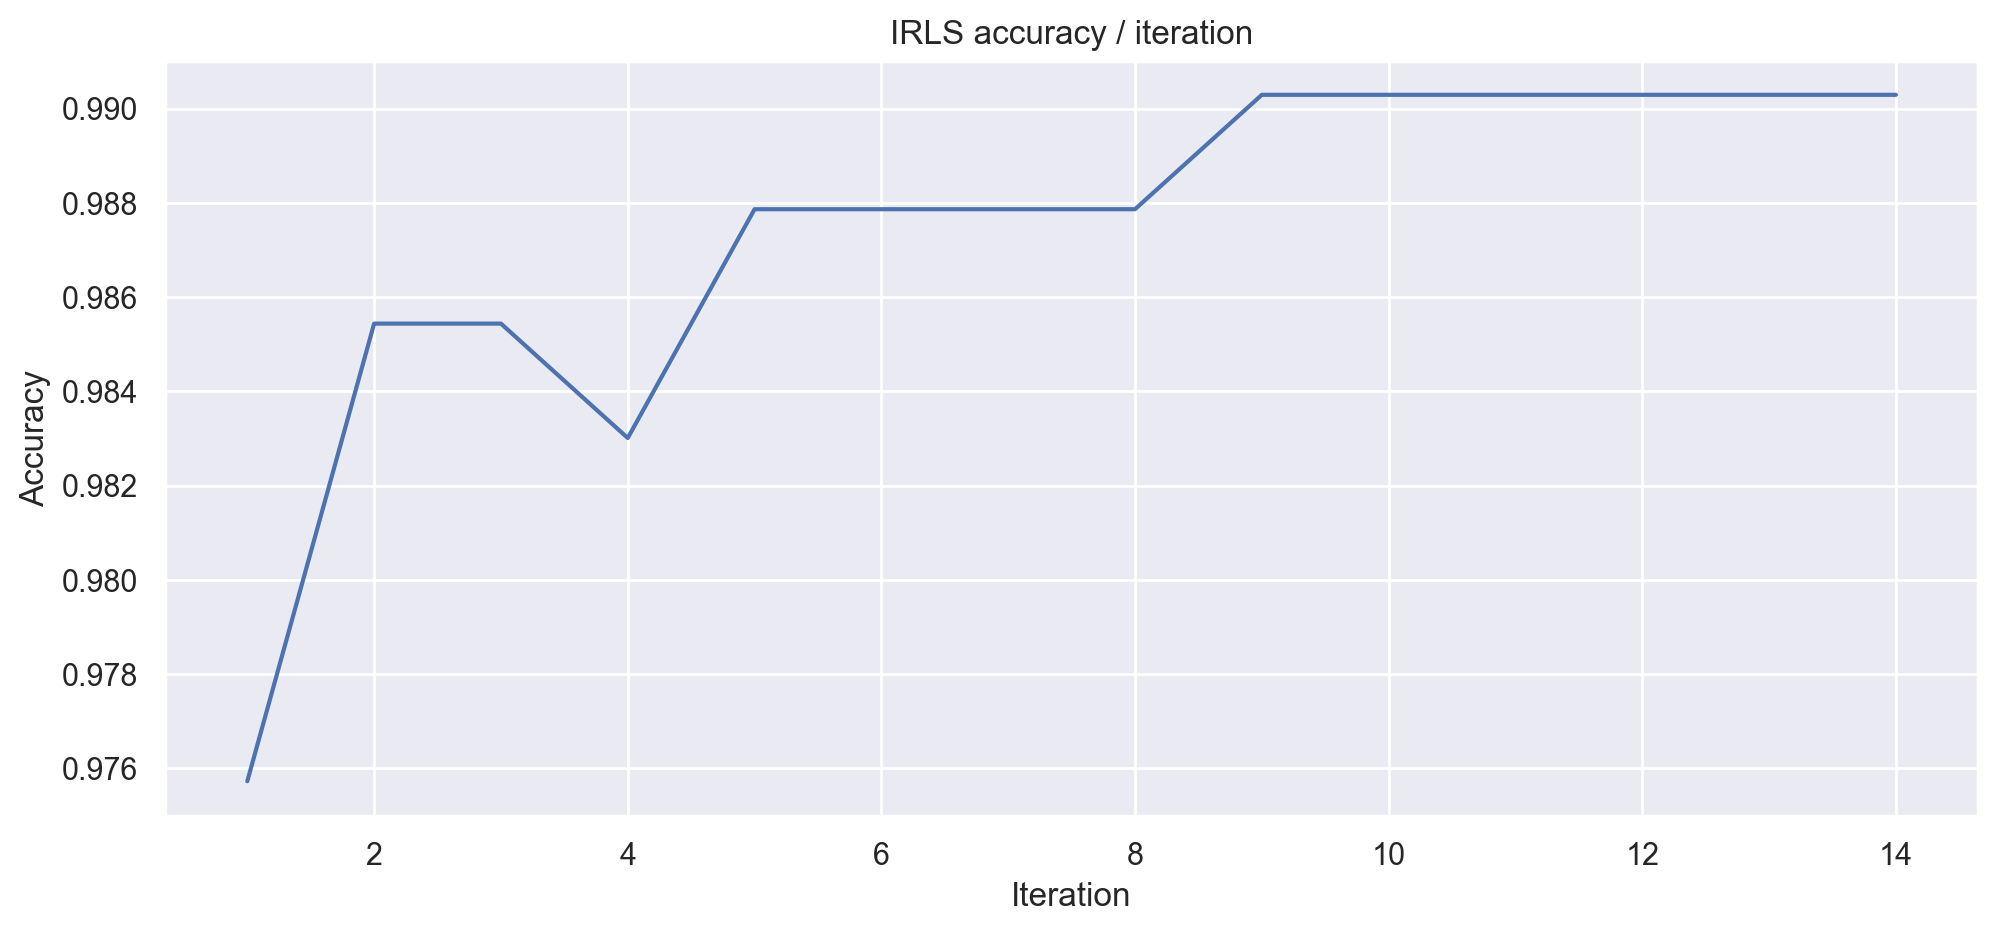

In [68]:
irls_iter_acc_list = [performance_over_iterations(X_train, y_train, iters, IRLS, n=1) 
                      for iters in tqdm(range(1, 15))]
irls_iter_acc = pd.DataFrame (irls_iter_acc_list,columns=['Iteration', 'Accuracy'])

sns.set_style("darkgrid")
sns.lineplot(data= irls_iter_acc, x = "Iteration", y = "Accuracy").set_title("IRLS accuracy / iteration")
plt.savefig('IRLS-Iteration', dpi = 300)

plt.show()

In [70]:
gd_iter_acc.loc[:, 'method'] = 'GD'
sgd_iter_acc.loc[:, 'method'] = 'SGD'
irls_iter_acc.loc[:, 'method'] = 'IRLS'
df = pd.concat([gd_iter_acc, sgd_iter_acc, irls_iter_acc])

In [72]:
px.line(df, x='Iteration', y='Accuracy', color='method')

### Convergence analysis

In [31]:
def cost_over_iterations(X, y, iterations : int, opt_method, n=10, tol=None):
    cost_list = []
    for i in range(n):
        beta, cost = opt_method(X, y, n_iter = iterations, tolerance=None, get_cost=True)
        cost_list.append(cost)
    return [iterations, np.mean(cost_list)]

from_iter, to_iter, step_size = 1, 101, 1

  0%|          | 0/100 [00:00<?, ?it/s]

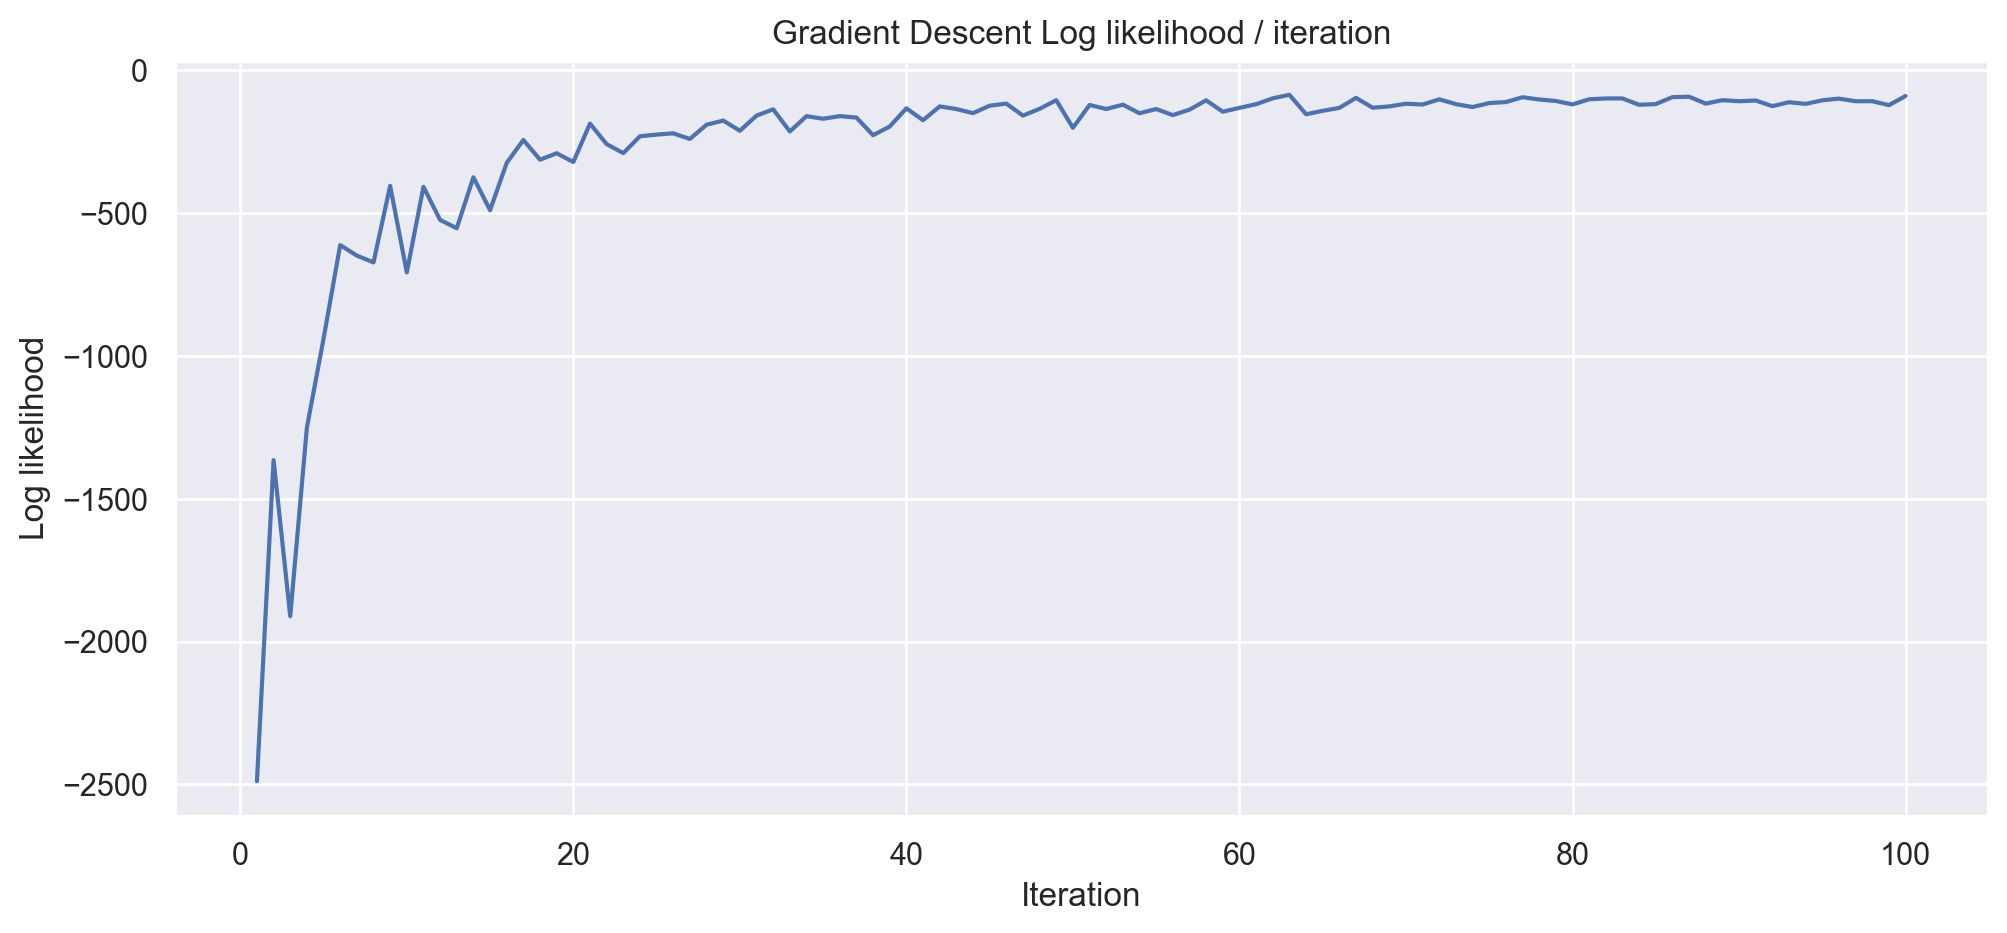

In [32]:
np.random.seed(500)

gd_iter_loglike_list = [cost_over_iterations(X_train, y_train, iters, gradient_descent) 
                    for iters in tqdm(range(from_iter, to_iter, step_size))]
gd_iter_loglike = pd.DataFrame (gd_iter_loglike_list,columns=['Iteration', 'Log likelihood'])

sns.set_style("darkgrid")
sns.lineplot(data= gd_iter_loglike, x = "Iteration", y = "Log likelihood").set_title("Gradient Descent Log likelihood / iteration")
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

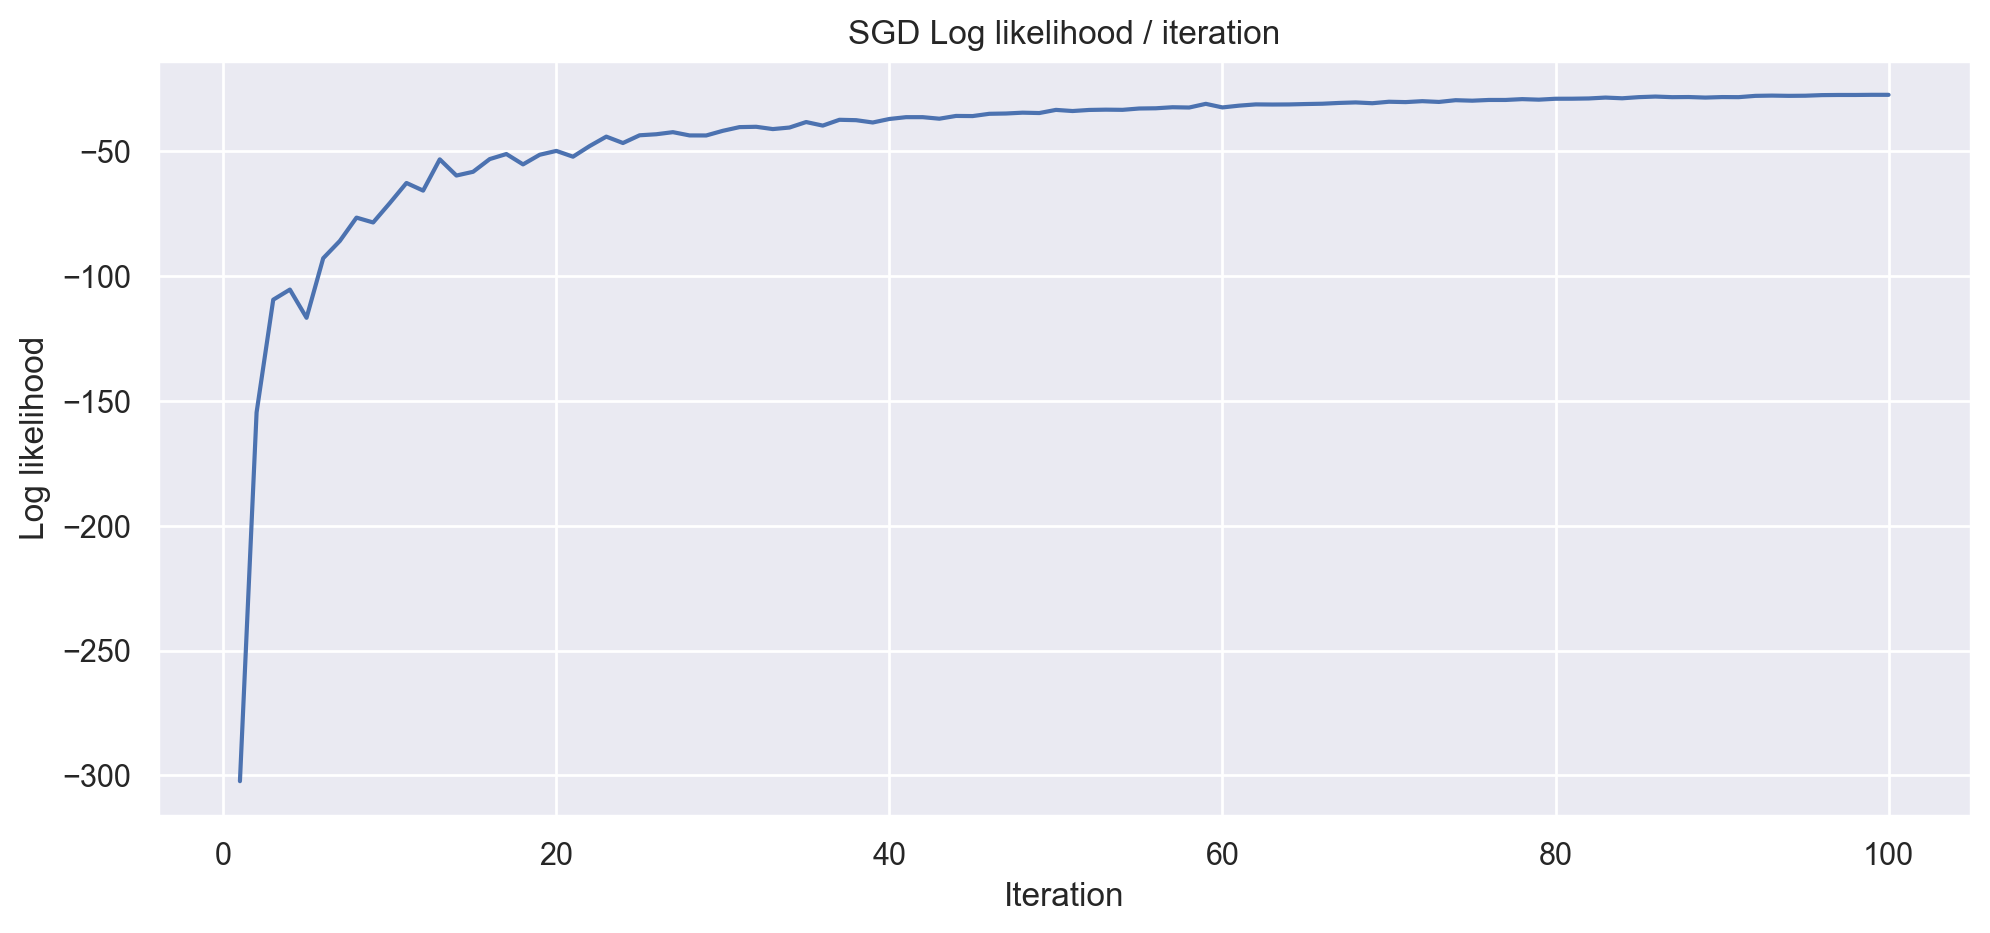

In [33]:
np.random.seed(500)

sgd_iter_loglike_list = [cost_over_iterations(X_train, y_train, iters, SGD) 
                    for iters in tqdm(range(from_iter, to_iter, step_size))]
sgd_iter_loglike = pd.DataFrame (sgd_iter_loglike_list,columns=['Iteration', 'Log likelihood'])

sns.set_style("darkgrid")
sns.lineplot(data= sgd_iter_loglike, x = "Iteration", y = "Log likelihood").set_title("SGD Log likelihood / iteration")
plt.show()

  0%|          | 0/14 [00:00<?, ?it/s]

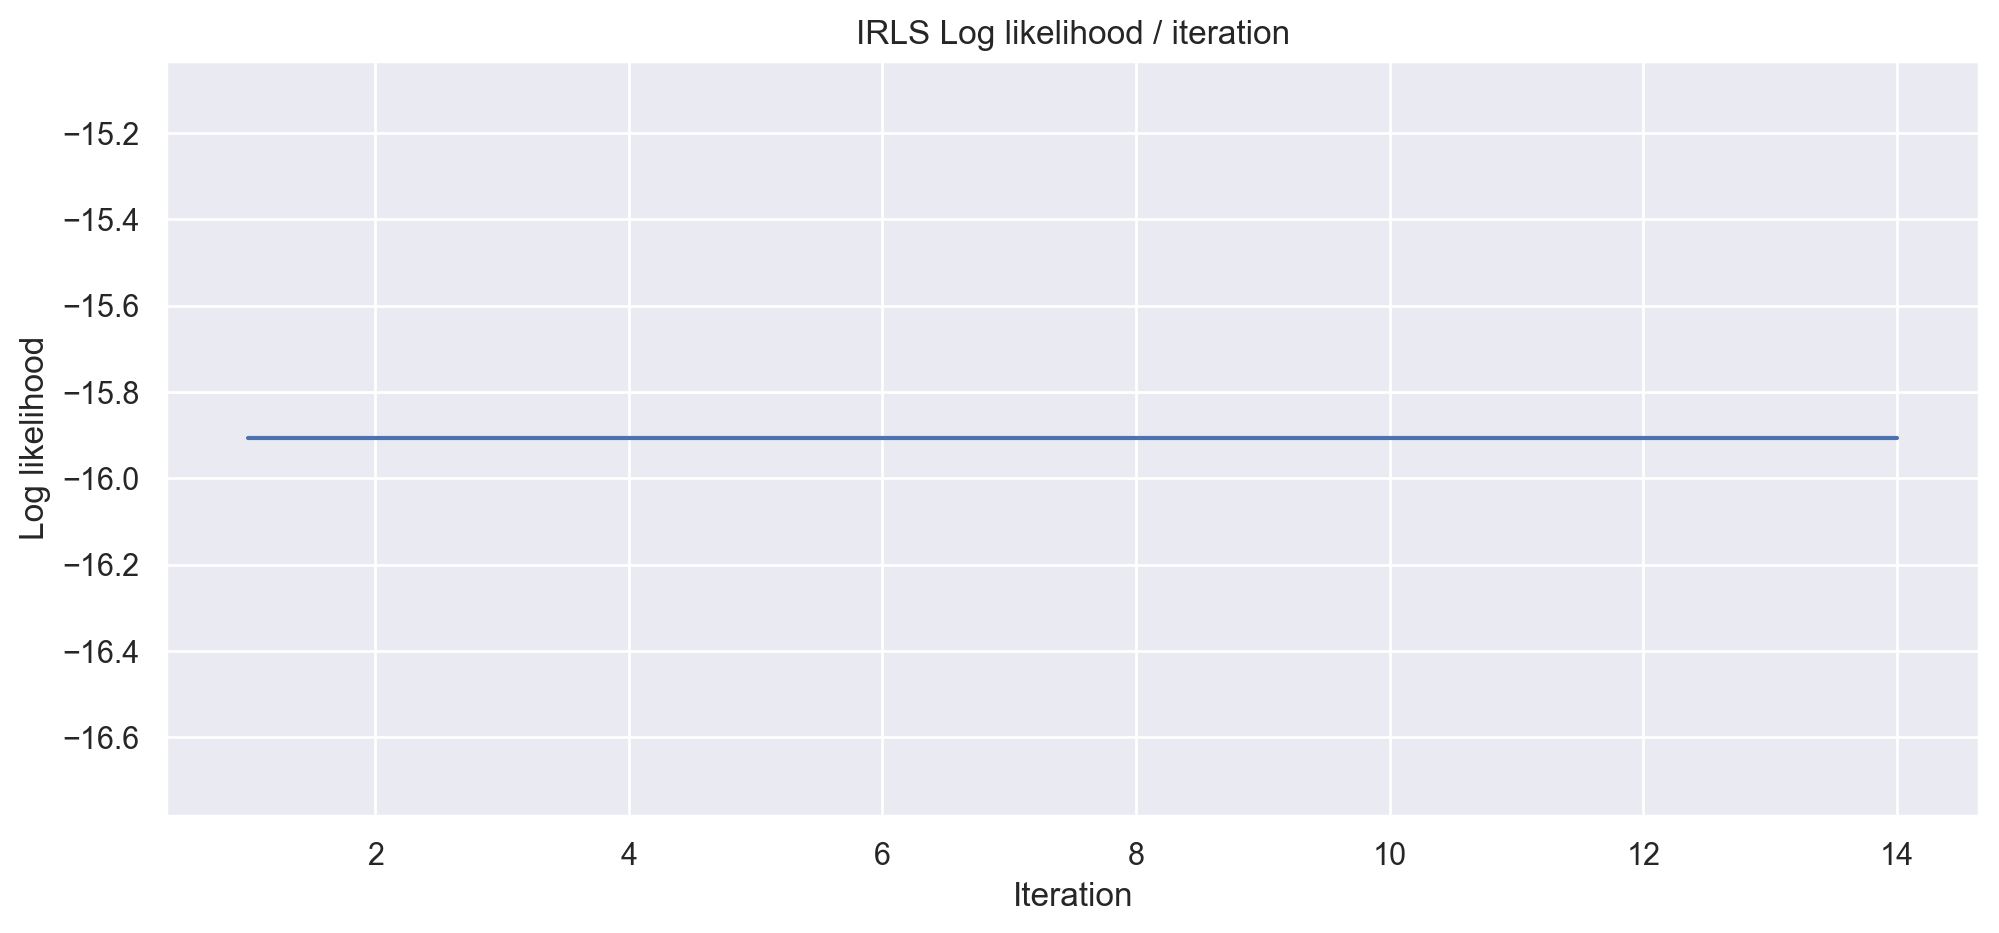

In [34]:
np.random.seed(500)

irls_iter_loglike_list = [cost_over_iterations(X_train, y_train, iters, IRLS, n=1) 
                    for iters in tqdm(range(1, 15))]
irls_iter_loglike = pd.DataFrame (irls_iter_loglike_list,columns=['Iteration', 'Log likelihood'])

sns.set_style("darkgrid")
sns.lineplot(data= irls_iter_loglike, x = "Iteration", y = "Log likelihood").set_title("IRLS Log likelihood / iteration")
plt.show()

In [35]:
gd_iter_loglike.loc[:, 'method'] = 'GD'
sgd_iter_loglike.loc[:, 'method'] = 'SGD'
irls_iter_loglike.loc[:, 'method'] = 'IRLS'
df = pd.concat([gd_iter_loglike, sgd_iter_loglike, irls_iter_loglike])

In [36]:
px.line(df, x='Iteration', y='Log likelihood', color='method')

### Learning rate impact

In [37]:
def cost_over_iterations(X, y, iterations, opt_method, n=10, tol=1e-4, l_rate=0.01):
    cost_list = []
    for i in range(n):
        beta, cost = opt_method(X, y, iterations, l_rate=l_rate, tolerance=None, get_cost=True)
        cost_list.append(cost)
    return [iterations, l_rate, np.mean(cost_list)]

from_iter, to_iter, step_size = 1, 51, 1

In [38]:
np.random.seed(500)

gd_iter_acc_list = [cost_over_iterations(X_train, y_train, iters, gradient_descent, l_rate=l_rate) 
                    for iters in tqdm(range(from_iter, to_iter, step_size))
                    for l_rate in np.logspace(-1, -6, 6)]
gd_iter_acc = pd.DataFrame (gd_iter_acc_list,columns=['Iteration', 'lr', 'Log likelihood'])

px.line(gd_iter_acc, x='Iteration', y='Log likelihood', color='lr')

  0%|          | 0/50 [00:00<?, ?it/s]

In [39]:
np.random.seed(500)

gd_iter_acc_list = [cost_over_iterations(X_train, y_train, iters, SGD, l_rate=l_rate) 
                    for iters in tqdm(range(from_iter, to_iter, step_size))
                    for l_rate in np.logspace(-1, -6, 6)]
gd_iter_acc = pd.DataFrame (gd_iter_acc_list,columns=['Iteration', 'lr', 'Log likelihood'])

px.line(gd_iter_acc, x='Iteration', y='Log likelihood', color='lr')

  0%|          | 0/50 [00:00<?, ?it/s]

### Testing against other methods form sickit learn

Logistic Regression from sklearn

In [40]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train[:, 1:], y_train)
clf.score(X_test[:, 1:], y_test)

0.9878640776699029

In [41]:
clf.coef_

array([[-3.09539479, -1.74854572, -2.11058743, -0.07508766]])

KNeighborsClassifier from sklearn

In [42]:
nca = NeighborhoodComponentsAnalysis(random_state=42, max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train[:, 1:], y_train)
nca_pipe.score(X_test[:, 1:], y_test)

1.0

LDA ftom sklearn

In [43]:
clf = LinearDiscriminantAnalysis().fit(X_train[:, 1:], y_train)
clf.score(X_test[:, 1:], y_test)

0.9805825242718447

QDA from sklearn

In [44]:
clf = QuadraticDiscriminantAnalysis().fit(X_train[:, 1:], y_train)
clf.score(X_test[:, 1:], y_test)

0.9927184466019418

In [27]:
datasets_list = ['banknote', 'diabetes', 'haberman', 'sonar']

In [28]:
log_reg = LogisticRegression(random_state=0, max_iter=1000)

nca = NeighborhoodComponentsAnalysis(random_state=42, max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)
knn = Pipeline([('nca', nca), ('knn', knn)])

lda = LinearDiscriminantAnalysis()

qda = QuadraticDiscriminantAnalysis()

In [29]:
for dataset_name in datasets_list:
    X, y = datasets[dataset_name]
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    for name, our_method in zip(['GD', 'SGD', 'IRLS'], [gradient_descent, SGD, IRLS]):
        beta = our_method(X_train, y_train, n_iter=1000, tolerance=0.001)
        pred = (sigmoid(X_test, beta) > 0.5).astype(int)
        res = calculate_scores(y_test, pred, beta=beta)
        print(dataset_name, name, res['acc'])
    for name, sklearn_method in zip(['LR', 'kNN', 'LDA', 'QDA'], [log_reg, knn, lda, qda]):
        sklearn_method.fit(X_train[:, 1:], y_train)
        pred = sklearn_method.predict(X_test[:, 1:])
        res = calculate_scores(y_test, pred, beta=beta)
        print(dataset_name, name, res['acc'])

banknote GD 0.9878640776699029
banknote SGD 0.9878640776699029
banknote IRLS 0.9902912621359223
banknote LR 0.9878640776699029
banknote kNN 1.0
banknote LDA 0.9805825242718447
banknote QDA 0.9927184466019418
diabetes GD 0.6320346320346321
diabetes SGD 0.7056277056277056
diabetes IRLS 0.7359307359307359
diabetes LR 0.7359307359307359
diabetes kNN 0.658008658008658
diabetes LDA 0.7316017316017316
diabetes QDA 0.7662337662337663
haberman GD 0.717391304347826
haberman SGD 0.34782608695652173
haberman IRLS 0.7391304347826086
haberman LR 0.7391304347826086
haberman kNN 0.6956521739130435
haberman LDA 0.7391304347826086
haberman QDA 0.7391304347826086
sonar GD 0.5645161290322581


<ipython-input-20-7385aecba9e4>:17: RuntimeWarning:

invalid value encountered in true_divide



sonar SGD 0.6774193548387096
sonar IRLS 0.7096774193548387
sonar LR 0.7096774193548387
sonar kNN 0.7741935483870968
sonar LDA 0.7903225806451613
sonar QDA 0.7096774193548387


### Mock data for testing

In [ ]:
# lets create simple dataset consiting of N point in R2 that can belong to 2 classes
N = 1000
X = np.random.randn(N * 2).reshape(N, 2) - 1
X[:N//2] = X[:N//2] + 2
y = np.array([0] * (N//2) + [1] * (N//2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y)
show_plot(fig)

In [ ]:
# add column of ones to include intercept in the model
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis = 1)

In [ ]:
beta = gradient_descent(X, y, l_rate=1e-4)
pred = (sigmoid(X, beta) > 0.5).astype(int)
res = calculate_scores(y, pred)
print(f'The resulting accuracy is {res["acc"]*100:.2f}%')
res['conf_matrix'].head()

In [ ]:
beta = SGD(X, y, l_rate=1e-4)
pred = (sigmoid(X, beta) > 0.5).astype(int)
res = calculate_scores(y, pred)
print(f'The resulting accuracy is {res["acc"]*100:.2f}%')
res['conf_matrix'].head()

In [ ]:
# This is low because IRLS is fucking up with the added intercept column, if you remove the intercept
# works as intended, I'll need to check on that maybe tomorrow
beta = IRLS(X, y, n_iter=1000, )
pred = (sigmoid(X, beta) > 0.5).astype(int)
res = calculate_scores(y, pred)
print(f'The resulting accuracy is {res["acc"]*100:.2f}%')
res['conf_matrix'].head()

In [ ]:
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(xx, yy)
xx, yy = xx.flatten(), yy.flatten()
mock_data = np.array([np.ones(len(xx)), xx, yy]).T
values = sigmoid(mock_data, beta)
go.Figure(
    [
        go.Contour(x=xx, y=yy, z=values),
        go.Scatter(x=X[y==0, 1], y=X[y==0, 2], mode='markers', marker_color='red'),
        go.Scatter(x=X[y==1, 1], y=X[y==1, 2], mode='markers', marker_color='blue')
    ],
    layout=dict(
        xaxis=dict(scaleanchor='y', scaleratio=1),
        width=600, height=600,
        showlegend=False
    )
)